In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sys
from numpy import *
from numpy.linalg import *

from eg_con_pivot_juan import *

eps=sys.float_info.epsilon

#--------------EG con pivot---------------

def pivot(a:np.array,i)->int:
    max=abs(a[i,i])
    res=0
    for k in range(i+1,len(a)):
        if(abs(a[k,i])>max):
            max=a[k,i]
            res=k
    return res

def producto_punto(v:np.array,w:np.array):
    res=0
    for i in range(0,v.size):
        res+=v[i]*w[i]
    return res

#Para poder limitar el error numérico y que el algoritmo sea correcto (i.e. devuelva S.I. cuando no hay solucion o alguna si existe) , consideramos que un x<=e-6 es efectivamente 0.Es decir , nos basamos en una precision de 6 digitos en los resultados.

def eliminacion_gaussiana_pivot(m:np.array,b:np.array)->np.array:
    if(len(m)!=len(m[0])):
        print("Error. Matriz no cuadrada")

    cota_decimal=eps*pow(10,6)

    #Construimos A' , extension de A con b
    n=len(m)
    m_ext=np.hstack((m,np.zeros((n,1))))
    m_ext[:,n]=b

    for i in range(0,n):

        fila_a_permutar=pivot(m_ext,i)
        if(fila_a_permutar>i):      #Para el caso que devuelve 0
            copy=np.array(m_ext[i,:])
            m_ext[i,:]=m_ext[fila_a_permutar,:]
            m_ext[fila_a_permutar,:]=copy

        #Si la columna ya es nula,paso.
        if(np.all(m_ext[i+1:,i] == 0)):
            continue
        
        for j in range(i+1,n):
            if(np.abs(m_ext[i,i])<cota_decimal):
                print("Posible Error Numérico.Cociente con divisor cercano a 0.\n")
            multiplier=m_ext[j,i]/m_ext[i,i]
            m_ext[j,:]=m_ext[j,:]-m_ext[i,:]*multiplier     #M_j=M_j - M_i * multiplier
            
    #print(m_ext)

    #Excepcion a devolver
    for i in range(0,n):
        if(np.abs(m_ext[i,i])>cota_decimal): #M_ii>0        
            continue
        elif(np.abs(m_ext[i,n])>cota_decimal):#    b_ii>0                    
            print("Sistema incompatible.No existen soluciones.")
            return 
        else:               #TODO:que hago si es SCI
            print("Hay infinitas soluciones.")            
            return


    #Ya A' escalonada -> despejamos x
    x=np.zeros(n)
    for i in range(n-1,-1,-1):
        b_i=m_ext[i,n]
        if(i==n-1):
            x[i]=b_i/m_ext[i,i]
            continue
        prod=producto_punto(m_ext[i,i+1:n],x[i+1:n])
        x[i]=(b_i-prod)/m_ext[i,i]

    #Devolvemos X=[x1,...,xn]
    return x




#matrix=np.array([[0,1,1,2],
#                 [2,-1,1,0],
#                 [3,1,0,1],
#                 [0,2,1,3]],dtype=np.float64)
#
#b=np.array([1,2,1,0],dtype=np.float64)

matrix=np.array([[1,3,2],
                 [0,2,4],
                 [2,1,3]],dtype=np.float32)

b=np.array([6,6,6],dtype=np.float32)

#print(matrix@eliminacion_gaussiana_pivot(matrix,b,0))
#print(eliminacion_gaussiana_pivot(matrix,b))


#Caso SI
b=np.array([1,2,1,0],dtype=np.float32)

matrix=np.array([[0,1,1,2],
                 [2,-1,1,0],
                 [3,1,0,1],
                 [0,2,1,3]],dtype=np.float32)

m=np.zeros((10,10))
for i in range(0,10):
    m[i,i]=-2
    if(i+1<10):
        m[i+1,i]=1
        m[i,i+1]=1

b=np.ones(10)
print(m)


solve(m,b)
m@eliminacion_gaussiana_pivot(m,b)





[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

[0] Valor Aprox: 0.9866669178009033 Valor Real:1.0000000000000000 

[1] Valor Aprox: 1.0000000000000000 Valor Real:1.0000000000000000 

[2] Valor Aprox: 1.0169490575790405 Valor Real:1.0000000000000000 

[3] Valor Aprox: 1.0026667118072510 Valor Real:1.0000000000000000 

[4] Valor Aprox: 1.0049067735671997 Valor Real:1.0000000000000000 

[5] Valor Aprox: 0.9999998211860657 Valor Real:1.0000000000000000 

[6] Valor Aprox: 1.0042303800582886 Valor Real:1.0000000000000000 

[7] Valor Aprox: 0.9956333041191101 Valor Real:1.0000000000000000 

[8] Valor Aprox: 1.0027791261672974 Valor Real:1.0000000000000000 

[9] Valor Aprox: 1.0000000000000000 Valor Real:1.0000000000000000 

[10] Valor Aprox: 1.0000000000000000 Valor Real:1.0000000000000000 

[11] Valor Aprox: 0.9979383945465088 Valor Real:1.0000000000000000 

[12] Valor Aprox: 0.9992207884788513 Valor Real:1.0000000000000000 

[13] Valor Aprox: 0.9981954097747803 Valor Real:1.0000000000000000 

[14] Valor Aprox: 0.9997209310531616 Valor R

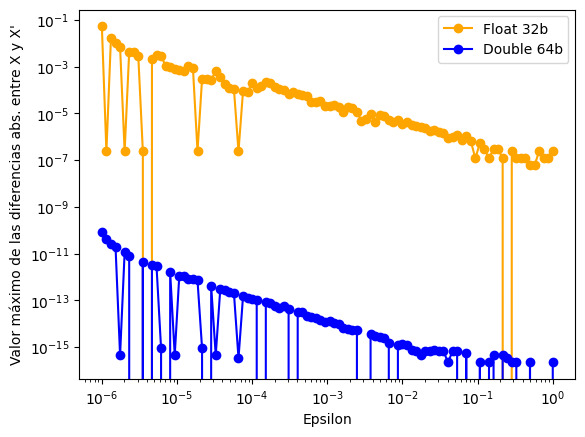

In [3]:
#Exploración de resultados -> la idea es ver como los resultados cambian en base a un sistema de representación numerica con mayor precision.El cual es el caso de DoublePrecisionFP(64 bits)

#Matrices
A_32=np.array([[1,2,3],
              [1,2,3],
              [1,2,3]],dtype=np.float32)

A_64=np.array([[1,2,3],
            [1,2,3],
            [1,2,3]],dtype=np.float64)

#Arrays de TI
b_32=np.array([6,6,6],dtype=np.float32)
b_64=np.array([6,6,6],dtype=np.float64)


#Epsilons a explorar
epsilons_32=np.logspace(-6,0,dtype=np.float32,num=100)
epsilons_64=np.logspace(-6,0,dtype=np.float64,num=100)

#Solucion del sistema
x_32=np.array([1,1,1],dtype=np.float32)
x_64=np.array([1,1,1],dtype=np.float64)

#Array de diferencias absolutas entre X y X'
max_dif_32=np.zeros(epsilons_32.size,dtype=np.float32)
max_dif_64=np.zeros(epsilons_32.size,dtype=np.float64)

for i in range(epsilons_32.size):
    e=epsilons_32[i]

    A_e_64=np.array([[0,e,-e],
                  [-e,0,e],
                  [e,-e,0]],dtype=np.float64)
    
    A_e_32=np.array([[0,e,-e],
                  [-e,0,e],
                  [e,-e,0]],dtype=np.float32)
    
    A_32=A_32+A_e_32
    A_64=A_64+A_e_64

    #print(A_32)

    #Hacemos EG y guardamos el vector X'
    aux_32=solve_con_pivot(A_32,b_32)
    aux_64=solve_con_pivot(A_64,b_64)
    

    #Buscamos norma infinito y la guardamos respecto al epsilon
    print("[%d] Valor Aprox: %5.16f Valor Real:%5.16f \n"  % (i,aux_32[1],x_32[1]))
    aux_32=aux_32-x_32  
    aux_64=aux_64-x_64

    aux_32=np.abs(aux_32)
    aux_64=np.abs(aux_64)   #|X'- X|

    max_dif_32[i]=np.max(aux_32)
    max_dif_64[i]=np.max(aux_64)


#Listos los valores ,graficamos los resultados.

plt.plot(epsilons_32,max_dif_32,'-o',label='Float 32b',color='orange')
plt.plot(epsilons_32,max_dif_64,'-o',label='Double 64b',color='blue')

plt.legend(loc='upper right')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Epsilon')
plt.ylabel("Valor máximo de las diferencias abs. entre X y X'")

print(epsilons_32[1])
print(max_dif_32[1]) #POsible cancelacion catastrofica????




In [365]:
#Test precision numerica
np.float64(320000/0.0000245678)
cota=eps*pow(10,6)







y=np.linspace(0.1,1,10)
x=np.linspace(0.2,1.1,10)
z=x+y
error=np.zeros(10)

for i in range(0,x.size):
    sum=x[i]+y[i]           
    error[i]=(x[i]+y[i])/eps - (z[i]/eps) # z[i]==x[y]+y[i]

print((x[0]+y[0]) - z[0])
print(y)
print(x)
print(z)        

((0.1 + 0.2) - 0.3 ) * 1e20
eps


0.0
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
[0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1]
True
